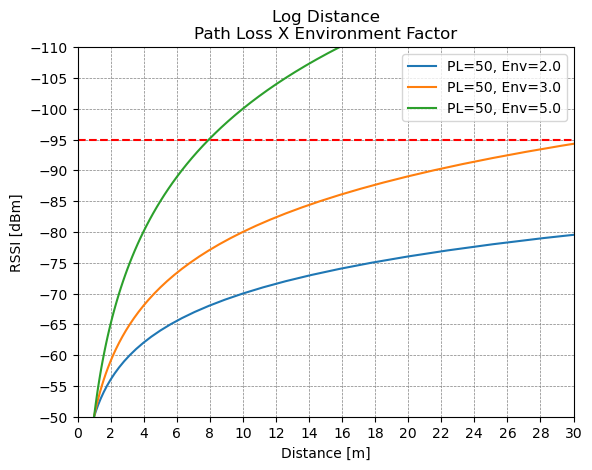

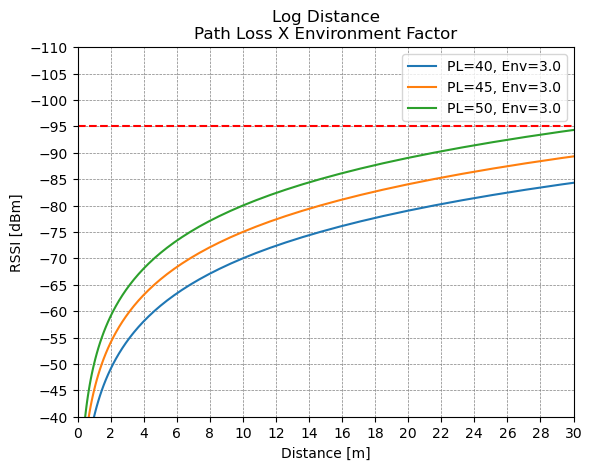

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def LogDist(rssi, env_factor = 5.0, ref_pathloss = 50):
	return pow(10.0, (-rssi - ref_pathloss) / (10.0 * env_factor))

def GenerateXY(path_loss, env_factor):
	start = -120
	end = 0
	x = np.array([LogDist(i, env_factor, path_loss) for i in range(start, end+1)], dtype=float)
	y = np.array([i for i in range(start, end+1)], dtype=float)
	return x, y

def SetupGraph(min_path_loss, start, end):

	plt.locator_params(axis='x', nbins=30)
	plt.locator_params(axis='y', nbins=15)

	x_ticks = np.array([str(i) for i in range(0, 31, 2)], dtype=float)
	y_ticks = np.array([str(i) for i in range(start, end+1, 5)], dtype=float)
	plt.xticks(x_ticks)
	plt.xlim((0, 30))
	plt.yticks(y_ticks)
	plt.ylim((-min_path_loss, -110))

	plt.xlabel('Distance [m]')
	plt.ylabel('RSSI [dBm]')

	plt.axhline(y=-95, color='r', linestyle='--')
	plt.grid(True, linestyle='--', color='gray', linewidth=0.5)

	plt.title(f"Log Distance\nPath Loss X Environment Factor")


SetupGraph(50, -120, -50)
params = [[50, 2.0], [50, 3.0], [50, 5.0]]
for p in params:
	x, y = GenerateXY(p[0], p[1])
	plt.plot(x, y, label=f"PL={p[0]}, Env={p[1]}")
plt.legend()
plt.show()

SetupGraph(40, -120, -40)
params = [[40, 3.0], [45, 3.0], [50, 3.0]]
for p in params:
	x, y = GenerateXY(p[0], p[1])
	plt.plot(x, y, label=f"PL={p[0]}, Env={p[1]}")
plt.legend()
plt.show()
